In [243]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import keras
from keras.models import Sequential
from keras.layers import Dense
from sklearn.metrics import confusion_matrix
from keras.layers import Dropout
from sklearn.metrics import classification_report
import seaborn as sns

In [170]:
df = pd.read_csv("adult.xls")
df.head()

,age,workclass,fnlwgt,education,education.num,marital.status,occupation,relationship,race,sex,capital.gain,capital.loss,hours.per.week,native.country,income
0,90,?,77053,HS-grad,9,Widowed,?,Not-in-family,White,Female,0,4356,40,United-States,<=50K
1,82,Private,132870,HS-grad,9,Widowed,Exec-managerial,Not-in-family,White,Female,0,4356,18,United-States,<=50K
2,66,?,186061,Some-college,10,Widowed,?,Unmarried,Black,Female,0,4356,40,United-States,<=50K
3,54,Private,140359,7th-8th,4,Divorced,Machine-op-inspct,Unmarried,White,Female,0,3900,40,United-States,<=50K
4,41,Private,264663,Some-college,10,Separated,Prof-specialty,Own-child,White,Female,0,3900,40,United-States,<=50K


In [171]:
coulmn=list(df.columns.values)
print(coulmn)

['age', 'workclass', 'fnlwgt', 'education', 'education.num', 'marital.status', 'occupation', 'relationship', 'race', 'sex', 'capital.gain', 'capital.loss', 'hours.per.week', 'native.country', 'income']


In [172]:
for i in coulmn:
  df.drop(df.loc[df[i]=="?"].index, inplace=True)
  #df = df.reset_index(drop=True)
#dataset = df.values
df.dropna(inplace=True)

In [173]:
df.head()

,age,workclass,fnlwgt,education,education.num,marital.status,occupation,relationship,race,sex,capital.gain,capital.loss,hours.per.week,native.country,income
1,82,Private,132870,HS-grad,9,Widowed,Exec-managerial,Not-in-family,White,Female,0,4356,18,United-States,<=50K
3,54,Private,140359,7th-8th,4,Divorced,Machine-op-inspct,Unmarried,White,Female,0,3900,40,United-States,<=50K
4,41,Private,264663,Some-college,10,Separated,Prof-specialty,Own-child,White,Female,0,3900,40,United-States,<=50K
5,34,Private,216864,HS-grad,9,Divorced,Other-service,Unmarried,White,Female,0,3770,45,United-States,<=50K
6,38,Private,150601,10th,6,Separated,Adm-clerical,Unmarried,White,Male,0,3770,40,United-States,<=50K


In [174]:
# feats = ['workclass','education','marital.status','occupation','relationship','race','sex','native.country','income']
# df_final = pd.get_dummies(df,columns=feats,drop_first=True)

In [175]:
# df_final.head()

In [176]:
def handle_non_numerical_data(df):
    columns = df.columns.values
    for column in columns:
        text_digit_vals = {}
        def convert_to_int(val):
            return text_digit_vals[val]

        if df[column].dtype != np.int64 and df[column].dtype != np.float64:
            column_contents = df[column].values.tolist()
            unique_elements = set(column_contents)
            x = 0
            for unique in unique_elements:
                if unique not in text_digit_vals:
                    text_digit_vals[unique] = x
                    x+=1

            df[column] = list(map(convert_to_int, df[column]))

    return df

In [177]:
df = handle_non_numerical_data(df)

In [178]:
df.head()

,age,workclass,fnlwgt,education,education.num,marital.status,occupation,relationship,race,sex,capital.gain,capital.loss,hours.per.week,native.country,income
1,82,0,132870,12,9,5,11,2,1,1,0,4356,18,4,1
3,54,0,140359,4,4,2,13,5,1,1,0,3900,40,4,1
4,41,0,264663,14,10,3,0,1,1,1,0,3900,40,4,1
5,34,0,216864,12,9,2,12,5,1,1,0,3770,45,4,1
6,38,0,150601,3,6,3,9,5,1,0,0,3770,40,4,1


In [179]:
X = df.drop(['income'],axis=1).values
y = df['income'].values

In [180]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [181]:
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [182]:
classifier = Sequential()
classifier.add(Dense(7, kernel_initializer = "uniform",activation = "relu", input_dim=14))

In [183]:
#classifier.add(Dropout(rate = 0.1))

In [184]:
classifier.add(Dense(3, kernel_initializer = "uniform",activation = "relu", input_dim=7))

In [185]:
# classifier.add(Dense(2, kernel_initializer = "uniform",activation = "relu", input_dim=3))

In [186]:
classifier.add(Dense(1, kernel_initializer = "uniform",activation = "sigmoid"))

In [187]:
classifier.compile(optimizer= "adam",loss = "binary_crossentropy",metrics = ["accuracy"])

In [188]:
classifier.fit(X_train, y_train, batch_size = 40, epochs = 20)

Epoch 1/20
604/604 [==============================] - 1s 1ms/step - loss: 0.5099 - accuracy: 0.8060: 0s - loss:
Epoch 2/20
604/604 [==============================] - 1s 1ms/step - loss: 0.3448 - accuracy: 0.8387
Epoch 3/20
604/604 [==============================] - 1s 2ms/step - loss: 0.3401 - accuracy: 0.8390
Epoch 4/20
604/604 [==============================] - 1s 2ms/step - loss: 0.3385 - accuracy: 0.8403
Epoch 5/20
604/604 [==============================] - 1s 1ms/step - loss: 0.3374 - accuracy: 0.8411
Epoch 6/20
604/604 [==============================] - 1s 1ms/step - loss: 0.3361 - accuracy: 0.8413
Epoch 7/20
604/604 [==============================] - 1s 1ms/step - loss: 0.3346 - accuracy: 0.8415
Epoch 8/20
604/604 [==============================] - 1s 1ms/step - loss: 0.3335 - accuracy: 0.8419
Epoch 9/20
604/604 [==============================] - 1s 2ms/step - loss: 0.3326 - accuracy: 0.8418: 0s - loss: 0.3332 
Epoch 10/20
604/604 [==============================] - 1s 1ms/step -

In [189]:
y_pred = classifier.predict(X_test)
y_pred = (y_pred > 0.5)

In [190]:
cm = confusion_matrix(y_test, y_pred)
cm

array([[ 974,  552],
       [ 348, 4159]], dtype=int64)

In [191]:
acc=(cm[0][0]+cm[1][1])/(cm[0][0]+cm[0][1]+cm[1][0]+cm[1][1])

In [192]:
print(acc)

0.8508204873197415


In [204]:
print("Class 0 means >50K")
print("Class 1 means <=50K")

Class 0 means >50K
Class 1 means <=50K


In [196]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.74      0.64      0.68      1526
           1       0.88      0.92      0.90      4507

    accuracy                           0.85      6033
   macro avg       0.81      0.78      0.79      6033
weighted avg       0.85      0.85      0.85      6033



In [247]:
print("Class 0 means >50K")
print("Class 1 means <=50K")

Class 0 means >50K
Class 1 means <=50K


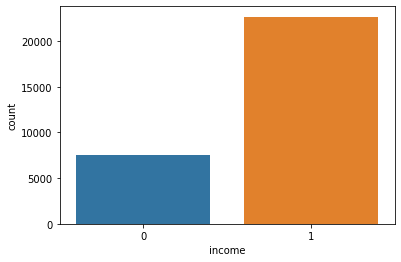

In [245]:
sns.countplot(x = 'income', data =df);